In [ ]:
!pip install datasets[audio] gradio

In [2]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /root/.cache/huggingface/datasets/PolyAI___minds14/en-AU/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [6]:
minds.description

'MINDS-14 is a dataset for the intent detection task with spoken data. It covers 14 intents extracted from a commercial system in the e-banking domain, associated with spoken examples in 14 diverse language varieties.'

In [10]:
minds.features

{'path': Value(dtype='string', id=None),
 'audio': Audio(sampling_rate=8000, mono=True, decode=True, id=None),
 'transcription': Value(dtype='string', id=None),
 'english_transcription': Value(dtype='string', id=None),
 'intent_class': ClassLabel(names=['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill'], id=None),
 'lang_id': ClassLabel(names=['cs-CZ', 'de-DE', 'en-AU', 'en-GB', 'en-US', 'es-ES', 'fr-FR', 'it-IT', 'ko-KR', 'nl-NL', 'pl-PL', 'pt-PT', 'ru-RU', 'zh-CN'], id=None)}

In [5]:
minds[90]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~FREEZE/response_19.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~FREEZE/response_19.wav',
  'array': array([ 0.00024414,  0.        ,  0.        , ...,  0.01306152,
         -0.00939941, -0.02282715]),
  'sampling_rate': 8000},
 'transcription': 'I want to put a temporary freeze on my card please',
 'english_transcription': 'I want to put a temporary freeze on my card please',
 'intent_class': 9,
 'lang_id': 2}

Removing columns that are not required

In [11]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [16]:
id2label = minds.features["intent_class"].int2str

In [18]:
import gradio as gr


def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]

    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

#demo.launch(debug=True) ## THis would keep running in colab do logging
demo.launch(debug=False,share=True) ## share=True, we can share this URL to someone else, although it expires in 72 hours.
#For free hosting, we need to run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:183: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e671c2461b2db55131.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


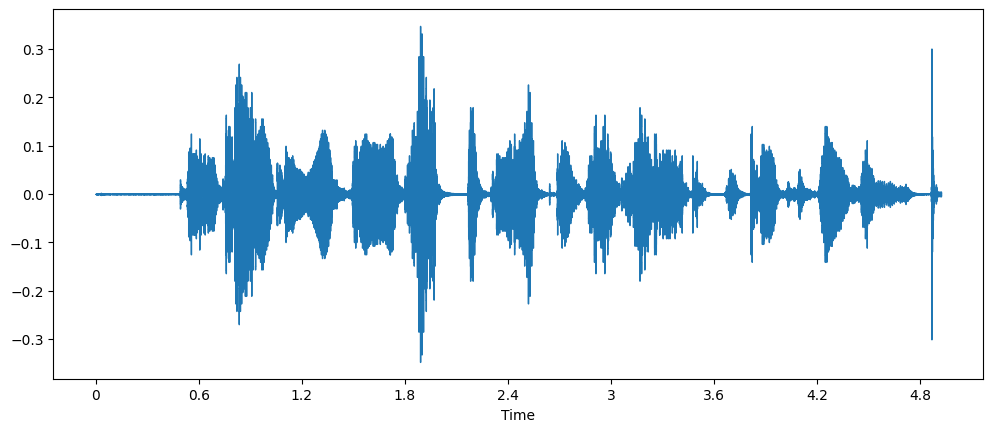

In [19]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
example=minds[100]
array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)